#1. Descarga y exploración del corpus

## 1.1 Descargar el dataset

In [1]:
# Especifico la ruta en Drive donde guardar el archivo descargado y descomprimido

ruta_destino_descarga = "/content/Video_Games.json.gz"
ruta_destino_descomprimido = "/content/Video_Games.json"

In [2]:
# Descargar el archvivo desde el repositorio

# URL del dataset
url_del_dataset = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Video_Games.json.gz'

# Descargo el dataset de Video Games y guardo el archivo en la ruta de destino especificada en Colab
!wget -O "{ruta_destino_descarga}" "{url_del_dataset}"

# Verifica que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descarga}"

# Descomprimo el archivo guardando el resultado en la ruta especificada de Drive
!gunzip -c "{ruta_destino_descarga}" > "{ruta_destino_descomprimido}"

# Verifico que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descomprimido}"


--2024-03-28 13:13:42--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Video_Games.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522823613 (499M) [application/x-gzip]
Saving to: ‘/content/Video_Games.json.gz’

/content/Video_Game 100%[===================>] 498.60M  12.6MB/s    in 35s     

2024-03-28 13:14:18 (14.4 MB/s) - ‘/content/Video_Games.json.gz’ saved [522823613/522823613]

-rw-r--r-- 1 root root 522823613 Apr 28  2023 /content/Video_Games.json.gz
-rw-r--r-- 1 root root 1702313074 Mar 28 13:14 /content/Video_Games.json


## 1.2 Cargar el dataset en un DataFrame

In [3]:
## Creo un dataset equilibrado de 10000 reseñas positivas y 10000 negativas
## Demora aproximadamente 3 min.
import pandas as pd

# Inicializo listas para almacenar registros positivos y negativos
registros_positivos = []
registros_negativos = []

# Especifico la ruta del archivo descomprimido
ruta_destino_descomprimido = "/content/Video_Games.json"

# Máximo número de registros por categoría
max_registros = 10000

with open(ruta_destino_descomprimido, 'r') as archivo:
    # Continúa leyendo mientras no se haya alcanzado el máximo en alguna de las listas
    while len(registros_positivos) < max_registros or len(registros_negativos) < max_registros:
        linea = archivo.readline()
        # Si se alcanza el final del archivo, detener el bucle
        if not linea:
            break
        registro = pd.read_json(linea, typ='series')
        overall = registro['overall']
        # Clasifica el registro como positivo o negativo
        if overall >= 4 and len(registros_positivos) < max_registros:
            registros_positivos.append(registro)
        elif overall <= 3 and len(registros_negativos) < max_registros:
            registros_negativos.append(registro)

# Combina las listas en un DataFrame
df_positivos = pd.DataFrame(registros_positivos)
df_negativos = pd.DataFrame(registros_negativos)

# Concatenar las muestras para formar el DataFrame final
df = pd.concat([df_positivos, df_negativos]).reset_index(drop=True)

In [4]:
print(f" Registros negativos {df_negativos.shape}  Reggistros positivos {df_positivos.shape}")

 Registros negativos (10000, 12)  Reggistros positivos (10000, 12)


In [5]:
print (df.head())

   overall vote  verified   reviewTime      reviewerID        asin  \
0      4.0   15      True   02 7, 2014  A1OKRM3QFEATQO  0439381673   
1      4.0  NaN      True  01 16, 2014  A19WLPIRHD15TH  0439381673   
2      5.0    2      True   01 7, 2014  A1TLA7XXSZMTS7  0439381673   
3      5.0  NaN     False  10 21, 2013  A3TPP95Y9DH3L9  0439381673   
4      5.0    3      True  10 29, 2012  A19GOZTT15KPG1  0439381673   

      reviewerName                                         reviewText  \
0  Amazon Customer  I had to learn the hard way after ordering thi...   
1   Karen Robinson  I would recommend this learning game for anyon...   
2       lori smith  Choose your career which sets your money for t...   
3       MollyMoore  It took a few hours to get this up and running...   
4            Dovie  I oredered this for a daughter who is now 33 a...   

                                             summary  unixReviewTime style  \
0  DOES NOT WORK WITH MAC OS unless it is 10.3 or...      1391

In [6]:
# Clasifica las puntaciones de 1 a 3 como negativas y 4 a 5 como  positivas
def label_sentiment(row):
  if int(row['overall']) < 4:
    return 0
  else:
    return 1

In [7]:
# Crea la columna sentiment para clasificar las review segun las estrellas. 1 a 3 negativos, 4 a 5 positivas.
df['sentiment'] = df.apply(lambda row: label_sentiment(row), axis=1)

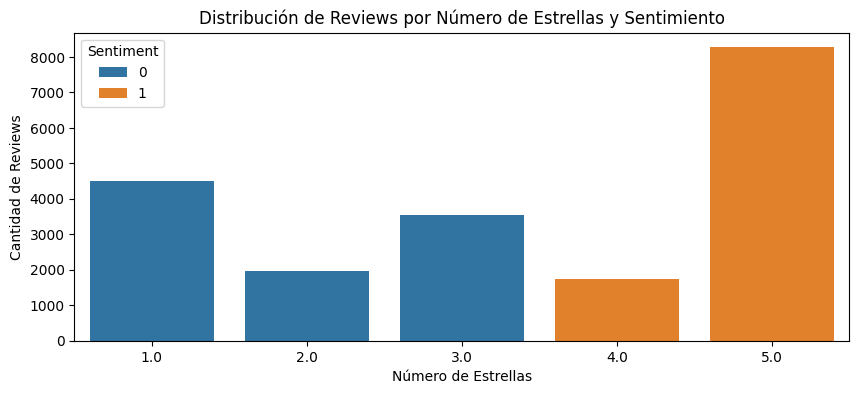

In [9]:
# Visualización conjunta de puntuación y sentimiento
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='overall', hue='sentiment')
plt.title('Distribución de Reviews por Número de Estrellas y Sentimiento')
plt.xlabel('Número de Estrellas')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Sentiment')
plt.show()


In [10]:
df_processed = df[['overall', 'reviewText', 'sentiment']]

###1.2.1 Guardo los registros selecciondos en un CSV (para su posterior procesamiento)


In [11]:
# Especifica la ruta completa donde quieres guardar el archivo CSV en Google Drive
ruta_destino_csv = f"/content/Video_Games_processed.csv"

# Guardar el DataFrame como CSV
df_processed.to_csv(ruta_destino_csv, index=False)

In [14]:
from google.colab import drive

# Monto Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
# Copio el archivo de Colab a Drive para su posterior uso

!cp "/content/Video_Games_processed.csv" "/content/drive/My Drive/Video_Games_processed.csv"

##1.3 Análisis exploratorio de datos (EDA)

In [17]:
import pandas as pd

# Ruta completa al archivo CSV en google drive
ruta_archivo_csv = f"/content/Video_Games_processed.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(ruta_archivo_csv)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

   overall                                         reviewText  sentiment
0      4.0  I had to learn the hard way after ordering thi...          1
1      4.0  I would recommend this learning game for anyon...          1
2      5.0  Choose your career which sets your money for t...          1
3      5.0  It took a few hours to get this up and running...          1
4      5.0  I oredered this for a daughter who is now 33 a...          1


### 1.3.1 Cardinalidad del vocabulario

In [18]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import ngrams
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import ConditionalFreqDist

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# Concatenar el texto de las reseñas en una sola cadena
texto_completo = ' '.join(df['reviewText'].dropna())

# Tokenizo el texto en palabras
palabras = word_tokenize(texto_completo)

# Filtra las palabras para eliminar las que no son alfanuméricas
palabras_texto = [palabra for palabra in palabras if palabra.isalpha()]

# Visualizo las primeras 100 palabras
print(f'Palabras: {palabras_texto[:100]}')
print(f'Palabras: {palabras_texto[101:200]}')
print(f'Palabras: {palabras_texto[201:300]}')

Palabras: ['I', 'had', 'to', 'learn', 'the', 'hard', 'way', 'after', 'ordering', 'this', 'for', 'my', 'MacBook', 'Pro', 'that', 'this', 'does', 'work', 'unless', 'you', 'have', 'MAC', 'OS', 'version', 'or', 'less', 'I', 'found', 'that', 'out', 'after', 'contact', 'the', 'Learning', 'Company', 'directly', 'They', 'were', 'very', 'prompt', 'in', 'their', 'response', 'However', 'I', 'also', 'have', 'a', 'laptop', 'with', 'Microsoft', 'This', 'program', 'loaded', 'beautifully', 'with', 'the', 'Microsoft', 'base', 'So', 'if', 'you', 'have', 'Microsoft', 'or', 'purchase', 'and', 'enjoy', 'this', 'game', 'Any', 'mac', 'systems', 'will', 'likely', 'have', 'issues', 'I', 'would', 'recommend', 'this', 'learning', 'game', 'for', 'anyone', 'who', 'likes', 'learning', 'about', 'history', 'I', 'really', 'like', 'playing', 'this', 'history', 'game', 'Choose', 'your', 'career']
Palabras: ['sets', 'your', 'money', 'for', 'the', 'trip', 'Then', 'name', 'how', 'many', 'and', 'who', 'will', 'be', 'traveli

In [20]:
# Cuento el número de palabras únicas
palabras_unicas = set(palabras_texto)
print(f'Cardinalidad del vocabulario es : {len(palabras_unicas)}')


Cardinalidad del vocabulario es : 43827


In [21]:
# Estudio los numeros incluidos en las reviews para ver si es posible encontrar referecias utiles
palabras_numericas = [palabra for palabra in palabras if palabra.isnumeric()]
print(f'Palabras: {palabras_numericas}')

Palabras: ['7', '7', '8', '8', '8', '33', '8', '10', '6', '7', '2205', '5', '1701', '1701', '2', '2070', '3', '2070', '2070', '1404', '3', '1', '2070', '4', '1404', '2', '3', '2', '3', '580', '1920', '1080', '100', '45', '2', '5', '360', '2', '2', '3', '3', '2', '2', '360', '2', '2011', '460', '590', '460', '6', '2011', '3', '2', '3', '2', '100', '360', '3', '2', '2', '8', '3', '2', '3', '2', '2', '2', '360', '7', '2', '4', '1', '650', '28', '3', '2', '2', '100', '73', '3', '2', '5', '3', '1', '1', '2', '3', '9800', '512', '3', '2', '3', '12', '2012', '50', '20', '10', '3', '100', '1', '5', '1', '3', '1', '5', '12', '49', '2010', '3', '7970', '3', '2370', '3', '3', '3', '3', '11', '3', '3', '2', '4650', '3', '30', '40', '4', '5', '24', '2016', '10', '2008', '2007', '6', '5', '100', '20', '6', '5', '18', '100', '100', '4', '2', '2', '1', '2', '3', '4', '2007', '16', '100', '100', '1', '2', '6', '20', '1', '2', '3', '4', '5', '6', '100', '6', '100', '7', '100', '49647', '50000', '2015', 

In [22]:
# Cuento el numero de palabras únicas luego de quitar los stop_words
stop_words = set(stopwords.words('english'))
palabras_texto_stopwords = [palabra for palabra in palabras_texto if not palabra in stop_words]

# Calcula la cardinalidad del vocabulario
vocabulario = set(palabras_texto_stopwords)
cardinalidad_vocabulario_sinstopwords = len(vocabulario)

print(f'Stop words: {stop_words}')

print(f'Cantidad de Stop words: {len(stop_words)}')

print(f'Cardinalidad del vocabulario sin stop-words: {cardinalidad_vocabulario_sinstopwords}')

Stop words: {"you've", "aren't", 'isn', 'needn', 'didn', 'during', "mustn't", 'through', 'aren', 'shouldn', "shouldn't", "hasn't", 'they', 'themselves', "you'll", 'who', 'should', 'shan', "she's", 'were', 'had', 'my', "didn't", "shan't", 'couldn', 'against', 'what', 'its', 'more', 'own', 'am', 'are', 'ourselves', 'yours', "it's", 'this', 'where', "haven't", 'not', "couldn't", 'yourselves', 'was', 'as', 'each', 'into', 'to', 'below', 'because', 'being', 'by', 'at', 'so', 'an', 'for', 'i', 've', "needn't", "should've", 'down', 'haven', 'weren', 'such', 'most', 'me', 'can', "weren't", 'we', 'do', 'on', 'again', 'out', 'don', 'yourself', 'from', 'doing', 'having', 'when', 'and', 'these', 'will', 'nor', 'she', "you'd", 'that', 'you', 'before', 'our', 'it', 'him', 'which', 'above', 'their', 'between', 'then', "wasn't", 'll', 'did', 'over', 'm', 'have', 'is', 'why', 'while', "won't", 'a', 'wouldn', 'mightn', 'wasn', 'her', 'your', 'the', 'o', 'herself', 'just', 'with', 'if', 'how', 'no', 'who

###1.3.2 N-Grams

In [23]:
# Tomo la tokenización ya realizada en las celdas anteriores
words_nltk = palabras

# Creo los bigramas y trigramas
bigrams = list(ngrams(words_nltk, 2))
trigrams = list(ngrams(words_nltk, 3))

# Si deseas imprimir algunos para verificar
print(bigrams[:5])  # Imprime los primeros 5 bigramas
print(trigrams[:5])  # Imprime los primeros 5 trigramas



[('I', 'had'), ('had', 'to'), ('to', 'learn'), ('learn', 'the'), ('the', 'hard')]
[('I', 'had', 'to'), ('had', 'to', 'learn'), ('to', 'learn', 'the'), ('learn', 'the', 'hard'), ('the', 'hard', 'way')]


In [24]:
print(df.head())

   overall                                         reviewText  sentiment
0      4.0  I had to learn the hard way after ordering thi...          1
1      4.0  I would recommend this learning game for anyon...          1
2      5.0  Choose your career which sets your money for t...          1
3      5.0  It took a few hours to get this up and running...          1
4      5.0  I oredered this for a daughter who is now 33 a...          1


###1.3.3 N-Grams de palabras

In [33]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

# Reemplazo valores NaN por cadenas vacías
df['reviewText'] = df['reviewText'].fillna('')

# Tokenizo cada reseña
df['tokens'] = df['reviewText'].apply(word_tokenize)

# Genera bigramas
bigrams_list = [bigram for sublist in df['tokens'].tolist() for bigram in list(bigrams(sublist))]
bigram_counts = Counter(bigrams_list)
most_common_bigrams = bigram_counts.most_common(10)

print(most_common_bigrams)

[(('.', 'The'), 11539), ((',', 'and'), 11091), (('.', 'I'), 10903), (('this', 'game'), 10881), (('of', 'the'), 9912), (('the', 'game'), 9636), ((',', 'but'), 8100), (('.', 'It'), 5957), (('in', 'the'), 5791), (('game', '.'), 5415)]


###1.3.4 Nube de palabras

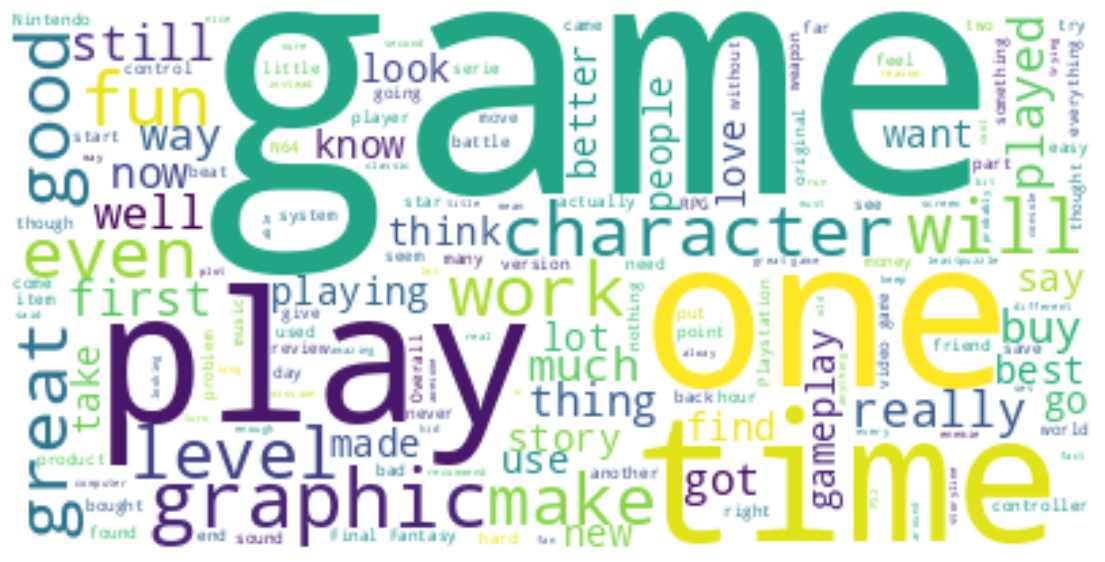

In [26]:
from wordcloud import WordCloud

# Uno todo el texto de las reseñas para la nube de palabras
texto_completo = ' '.join(df['reviewText'].dropna())
wordcloud = WordCloud(background_color='white').generate(texto_completo)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
print(df.head())

   overall                                         reviewText  sentiment  \
0      4.0  I had to learn the hard way after ordering thi...          1   
1      4.0  I would recommend this learning game for anyon...          1   
2      5.0  Choose your career which sets your money for t...          1   
3      5.0  It took a few hours to get this up and running...          1   
4      5.0  I oredered this for a daughter who is now 33 a...          1   

                                              tokens  
0  [I, had, to, learn, the, hard, way, after, ord...  
1  [I, would, recommend, this, learning, game, fo...  
2  [Choose, your, career, which, sets, your, mone...  
3  [It, took, a, few, hours, to, get, this, up, a...  
4  [I, oredered, this, for, a, daughter, who, is,...  


###1.3.5 word2Vec

In [28]:
from gensim.models import Word2Vec

sentences = df['tokens'].tolist()

# Entreno el modelo Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Guarda el modelo para uso futuro
model.save("/content/word2vec.model")

In [29]:
# Guardo el modelo

!cp "/content/word2vec.model" "/content/drive/My Drive/word2vec.model"

In [30]:
words = ['game', 'computer', 'player', 'video', 'graphics']  # Ejemplo de palabras a analizar
top_words = {}

for word in words:
    # Encontrar las 10 palabras mas similares para cada palabra en la lista
    top_words[word] = [w for w, sim in model.wv.most_similar(word, topn=10)]

In [31]:
from sklearn.decomposition import PCA
import numpy as np

# Obtengo los vectores de las palabras seleccionadas
word_vectors = np.array([model.wv[word] for word_list in top_words.values() for word in word_list])

# Uso PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

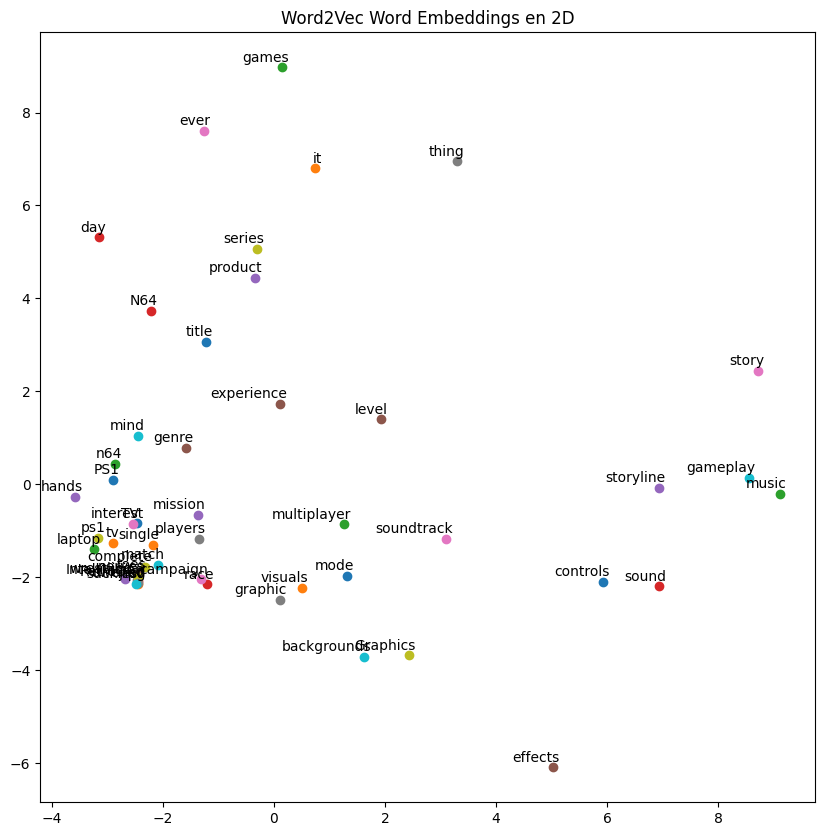

In [32]:
# Visualizacion de Word Embeddings

plt.figure(figsize=(10, 10))

# Dibuj los puntos de cada palabra en el espacio 2D
for i, word in enumerate(top_words.values()):
    for w in word:
        idx = word.index(w)
        plt.scatter(word_vectors_2d[i*10 + idx, 0], word_vectors_2d[i*10 + idx, 1])
        plt.annotate(w, xy=(word_vectors_2d[i*10 + idx, 0], word_vectors_2d[i*10 + idx, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

plt.title('Word2Vec Word Embeddings en 2D')
plt.show()

###1.3.6 Conclusiones de la exploracion

###### La nube de palabra nos da una visualización de alto nivel de las palabras mas frecuentes en las reviews. Las palabras mas grandes como "game", "play", "graphics", "fun", "good" y "great" son las mas frecuentes. Esto indica que los usuarios se refieren a la diversion general del juego. Lo que resalta las areas de interes de los jugadores.
Palabras como "story", "character", "level" destacan los elementos que pueden ser clave al momento de evaluar un juego. Esto parece indicar que tambien los usuarios no solo prestan atencion a la diversion sino tambien a la trama y desarrollo de personajes, diseño de niveles, etc.
En le grafico W2V vemos la cercania entre los coneceptos, ahi vemos "RPG, "classic" y "system" lo que podria indicar reseñas de juegos clasicos de rol. Pababras como "control", "sound" y "music" agrupadas sugieren que estas caracteristicas son discutidas frecuentemente en conjunto.